Main Project building testing and evaluation

# Import Required Library

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime, re, string, zipfile

# Data Manipulation
import numpy as np
import pandas as pd
import tensorflow as tf

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: ignored

#Check Top Machine Learning Algorithm efectiveness

## Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv

--2021-05-11 22:58:07--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv.2’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.04s   

2021-05-11 22:58:08 (7.82 MB/s) - ‘dataset_review_tokped_labelled.csv.2’ saved [294589/294589]



In [ ]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

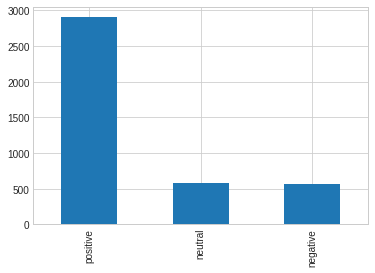

In [ ]:
pd.value_counts(df['Sentiment']).plot.bar()

In [ ]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


## Peprocess Dataset

In [ ]:
#removing stopwords
nltk.download('stopwords')
def stopword(sentence):
    review = [words for words in sentence.split() if words not in set(stopwords.words('indonesian'))]
    review = ' '.join(review)
    return review

df['Review'] = df['Review'].apply(stopword)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jos,5,neutral
...,...,...,...
4055,seller responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,beli yg 3,5,neutral


In [ ]:
#remove repeated char
# continously repeating character
# from the word 
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df['Review'] = df['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jos,5,neutral
...,...,...,...
4055,seler responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,god product trusted seler,5,positive
4058,beli yg 3,5,neutral


In [ ]:
#removing stopwords
nltk.download('stopwords')
def stopword(sentence):
    review = [words for words in sentence.split() if words not in set(stopwords.words('indonesian'))]
    review = ' '.join(review)
    return review

df['Review'] = df['Review'].apply(stopword)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jos,5,neutral
...,...,...,...
4055,seler responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,god product trusted seler,5,positive
4058,beli yg 3,5,neutral


In [ ]:
#stemming
from nltk import PorterStemmer 
ps = PorterStemmer() 
df['Review'] = df['Review'].apply(ps.stem)
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jo,5,neutral
...,...,...,...
4055,seler responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,god product trusted sel,5,positive
4058,beli yg 3,5,neutral


In [ ]:
print(df.shape)
#Removes duplicates in place
df.drop_duplicates(keep=False, inplace=True)
print(df.shape) 
df

(4060, 3)
(3880, 3)


,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jo,5,neutral
...,...,...,...
4055,seler responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,god product trusted sel,5,positive
4058,beli yg 3,5,neutral


In [ ]:
df["Sentiment"] = df["Sentiment"].astype('category')
df.dtypes
df['Sentiment'] = df['Sentiment'].cat.codes.astype(float)
print(df.dtypes)
df

Review        object
Rating         int64
Sentiment    float64
dtype: object


,Review,Rating,Sentiment
0,enak kuacinya,5,2.0
1,pengiriman cepat packing bagus sesuai pesanan ...,5,2.0
2,pengemasan dominan original atw asli kuacinya ...,4,0.0
3,terimakasih min,5,1.0
4,udah order kesekian kali jo,5,1.0
...,...,...,...
4055,seler responsif dicoba dibuka,5,1.0
4056,imut2 banget packing aman,5,2.0
4057,god product trusted sel,5,2.0
4058,beli yg 3,5,1.0


In [ ]:
#tf-Idf vectorizer
vectorizer = TfidfVectorizer() 
x = vectorizer.fit_transform(df['Review']) 
y =  df['Sentiment']

## Build Train and test sets

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Build Model

## Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 88.43
Accuracy CV 10-Fold: 76.32
Running Time: 0:00:03.724449


### K-Nearest Neighbours

In [ ]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 35.92
Accuracy CV 10-Fold: 29.09
Running Time: 0:00:00.699314


### Linear Support Vector Machines (SVC)

In [ ]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 95.68
Accuracy CV 10-Fold: 77.13
Running Time: 0:00:00.247490


### Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
model = SGDClassifier().fit(X_train, y_train)
print(model.loss_function_)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 95.36
Accuracy CV 10-Fold: 76.84
Running Time: 0:00:01.419065


### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 99.77
Accuracy CV 10-Fold: 72.62
Running Time: 0:00:01.680519


### Gradient Boost Trees

In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)

gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

[0.         0.         0.00034773 ... 0.         0.         0.        ]
Accuracy: 82.02
Accuracy CV 10-Fold: 74.84
Running Time: 0:00:56.384694


## Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

### Regular accuracy scores

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,99.77
3,Linear SVC,95.68
2,Stochastic Gradient Decent,95.36
1,Logistic Regression,88.43
5,Gradient Boosting Trees,82.09
0,KNN,35.92


In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
3,Linear SVC,77.13
2,Stochastic Gradient Decent,76.58
1,Logistic Regression,76.32
5,Gradient Boosting Trees,74.52
4,Decision Tree,72.62
0,KNN,29.09


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

**Challenge:** How could you improve the CatBoost model?

##Evaluate

In [ ]:
#making predictions
y_pred = model.predict(X_test)
#model accuracy
print("Model Accuracy : {}".format((y_pred == y_test).mean()))
#confusion matrix 
print(confusion_matrix(y_test,y_pred))

Model Accuracy : 0.7989690721649485
[[ 60   8  44]
 [  2  46  61]
 [ 13  28 514]]


#Building model with LSTM

## Load Dataset

In [61]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv

--2021-05-18 09:02:14--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv.1’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.007s  

2021-05-18 09:02:14 (38.0 MB/s) - ‘dataset_review_tokped_labelled.csv.1’ saved [294589/294589]



In [62]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

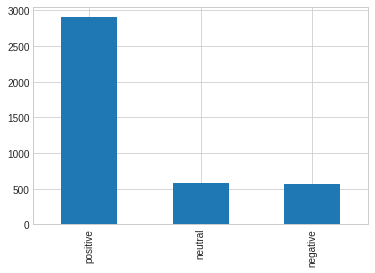

In [63]:
pd.value_counts(df['Sentiment']).plot.bar()

In [64]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


In [65]:
df["Sentiment"] = df["Sentiment"].astype('category')
df.dtypes

Review         object
Rating          int64
Sentiment    category
dtype: object

In [66]:
#separate column category and add value to it
category = pd.get_dummies(df.Sentiment)
df_new = pd.concat([df, category], axis=1)
# df_new = df_new.drop(columns='Sentiment')
df_new

,Review,Rating,Sentiment,negative,neutral,positive
0,enak kuacinya,5,positive,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative,1,0,0
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
...,...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral,0,1,0
4056,imut2 banget packing aman,5,positive,0,0,1
4057,good product trusted seller,5,positive,0,0,1
4058,sudah beli yg ke 3,5,neutral,0,1,0


## Peprocess Dataset

In [67]:
#remove repeated char
# continously repeating character
# from the word 
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df_new['Review'] = df_new['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df_new

,Review,Rating,Sentiment,negative,neutral,positive
0,enak kuacinya,5,positive,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative,1,0,0
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
...,...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,neutral,0,1,0
4056,imut2 banget packing aman,5,positive,0,0,1
4057,god product trusted seler,5,positive,0,0,1
4058,sudah beli yg ke 3,5,neutral,0,1,0


In [68]:
print(df_new.shape)
#Removes duplicates in place
df_new.drop_duplicates(keep=False, inplace=True)
print(df_new.shape) 
df_new

(4060, 6)
(3979, 6)


,Review,Rating,Sentiment,negative,neutral,positive
0,enak kuacinya,5,positive,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative,1,0,0
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
...,...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,neutral,0,1,0
4056,imut2 banget packing aman,5,positive,0,0,1
4057,god product trusted seler,5,positive,0,0,1
4058,sudah beli yg ke 3,5,neutral,0,1,0


In [69]:
#to check shape of the dataset
print(df_new.shape) 

#to look the header of dataset
df_new.info()

(3979, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3979 entries, 0 to 4059
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Review     3979 non-null   object  
 1   Rating     3979 non-null   int64   
 2   Sentiment  3979 non-null   category
 3   negative   3979 non-null   uint8   
 4   neutral    3979 non-null   uint8   
 5   positive   3979 non-null   uint8   
dtypes: category(1), int64(1), object(1), uint8(3)
memory usage: 108.9+ KB


## change data type

In [70]:
#get label of dataset
content = df_new['Review'].values
label = df_new[['negative', 'neutral', 'positive']].values

## Build Train and test sets

In [71]:
content_train, content_test, label_train, label_test = train_test_split(content, label, test_size=0.2)

## Tokenizer

In [72]:
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(content_train) 
 
sekuens_train = tokenizer.texts_to_sequences(content_train)
sekuens_test = tokenizer.texts_to_sequences(content_test)
 
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=20) 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)

## Build Model

In [73]:
#build model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=8),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Callback

In [74]:
#to stop train while acuracy greather than 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
      print("\nAccuracy and val accuracy has reach >90%!")
      self.model.stop_training = True
callbacks = myCallback()

## Train

In [75]:
num_epochs = 16
history = model.fit(padded_train, label_train, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=1)

Epoch 1/16
100/100 [==============================] - 4s 19ms/step - loss: 0.9116 - accuracy: 0.6704 - val_loss: 0.7439 - val_accuracy: 0.7098
Epoch 2/16
100/100 [==============================] - 1s 14ms/step - loss: 0.6138 - accuracy: 0.7487 - val_loss: 0.5778 - val_accuracy: 0.7852
Epoch 3/16
100/100 [==============================] - 1s 14ms/step - loss: 0.4121 - accuracy: 0.8207 - val_loss: 0.5818 - val_accuracy: 0.7663
Epoch 4/16
100/100 [==============================] - 1s 14ms/step - loss: 0.3355 - accuracy: 0.8661 - val_loss: 0.6234 - val_accuracy: 0.7739
Epoch 5/16
100/100 [==============================] - 1s 14ms/step - loss: 0.2665 - accuracy: 0.8999 - val_loss: 0.7471 - val_accuracy: 0.7688
Epoch 6/16
100/100 [==============================] - 1s 14ms/step - loss: 0.2235 - accuracy: 0.9187 - val_loss: 0.6943 - val_accuracy: 0.7714
Epoch 7/16
100/100 [==============================] - 1s 14ms/step - loss: 0.1823 - accuracy: 0.9405 - val_loss: 0.7595 - val_accuracy: 0.7739

##plotting

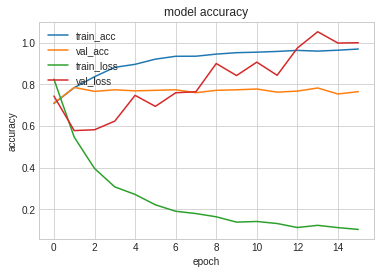

In [76]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss','val_loss'], loc='upper left')
plt.show()

##save model

In [77]:
saving_path = ("/content/mymodel/") #path penyimpanan model
tf.saved_model.save(model, saving_path)

model.save('mymodel.h5')

INFO:tensorflow:Assets written to: /content/mymodel/assets


INFO:tensorflow:Assets written to: /content/mymodel/assets


##testing

In [78]:
from tensorflow.keras.models import Sequential, save_model, load_model
# Load the model
# model = load_model(saving_path, compile = True)
# Recreate the exact same model, including its weights and the optimizer
loaded_model = tf.keras.models.load_model('mymodel.h5')

# Show the model architecture
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           40000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                18688     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 75,459
Trainable params: 75,459
Non-trainable params: 0
__________________________________________________

In [79]:
loaded_model.evaluate(padded_test,label_test)

25/25 [==============================] - 1s 4ms/step - loss: 1.0001 - accuracy: 0.7651


[1.0000579357147217, 0.7650753855705261]

In [80]:
content_testing = np.array(['terimakasih', 'enak tapi gosong', 'rasanya enak dan pengiriman cepat'])
def tokenizer(content_train, arr):
  tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
  tokenizer.fit_on_texts(content_train) 
  sekuens_test = tokenizer.texts_to_sequences(arr)
  padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)
  return padded_test

result = loaded_model.predict(tokenizer(content_train,content_testing))
print(result)
classes = np.argmax(result, axis = 1)
print(classes)

[[7.2927745e-03 8.4374481e-01 1.4896235e-01]
 [9.8839325e-01 9.8275281e-03 1.7792528e-03]
 [1.8335306e-05 9.2169683e-04 9.9905998e-01]]
[1 0 2]


#Building model with LSTM (2)

## Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv

--2021-05-11 12:40:35--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.03s   

2021-05-11 12:40:35 (8.68 MB/s) - ‘dataset_review_tokped_labelled.csv’ saved [294589/294589]



In [115]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

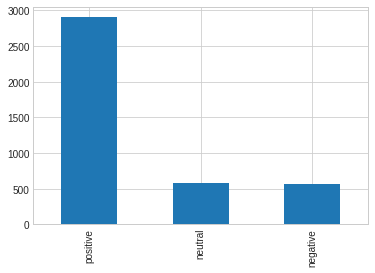

In [116]:
pd.value_counts(df['Sentiment']).plot.bar()

In [117]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


In [119]:
#separate column category and add value to it
category = pd.get_dummies(df.Sentiment)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='Sentiment')
df

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,good product trusted seller,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


## Peprocess Dataset

In [120]:
#remove repeated char
# continously repeating character
# from the word 
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df['Review'] = df['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


In [121]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])


#remove stopword pada list token
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (list_stopwords)]))

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan dominan original atw asli kuacinya ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler responsif dicoba dibuka,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,beli 3,5,0,1,0


In [122]:
print(df.shape)
#Removes duplicates in place
df.drop_duplicates(keep=False, inplace=True)
print(df.shape) 
df

(4060, 5)
(3863, 5)


,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan dominan original atw asli kuacinya ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler responsif dicoba dibuka,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,beli 3,5,0,1,0


## change data type

In [123]:
#get label of dataset
content = df['Review'].values
label = df[['negative', 'neutral', 'positive']].values

## Build Train and test sets

In [124]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
validation_portion = .2

In [125]:
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(content, labels, test_size=validation_portion)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

3090
3090
773
773


## Tokenizer

In [126]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

5
120
2
120
7
120


In [127]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

773
(773, 120)


In [128]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

df

[1]
[1]
[1]
(3090, 1)
[1]
[1]
[1]
(773, 1)


,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan dominan original atw asli kuacinya ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler responsif dicoba dibuka,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,beli 3,5,0,1,0


## Build Model

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 75        
Total params: 16,483
Trainable params: 16,483
Non-trainable params: 0
_________________________________________________________________


## Train

In [130]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30


ValueError: ignored

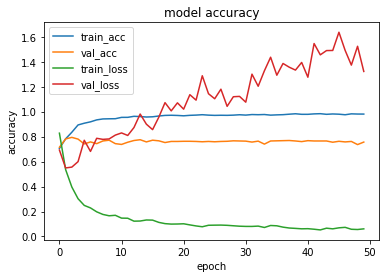

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss','val_loss'], loc='upper left')
plt.show()